In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 360)

In [2]:
df_train = pd.read_csv('kc_house_data_train.csv', index_col = 0)

In [3]:
df_train['second_sale'] = [1 if x == True else 0 for x in df_train.duplicated(subset='id', keep='last')]
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0


In [4]:
def date_time(df):
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    df['date'] = df['date'].apply(lambda x: x.value)

In [5]:
date_time(df_train)

In [6]:
# date values are seconds since Jan 1st, 1970 - let's convert to months since 
# Jan 1st, 2010 instead.

avg_days_per_month = 365.25/12

init = pd.to_datetime('1970-01-01 00:00:00')
twenty_ten = pd.to_datetime('2010-01-01 00:00:00')

forty_years = twenty_ten - init
forty_years.value / (60*60*24*(10**9))

14610.0

In [7]:
df_train['months_since_2010'] = (df_train['date'] - forty_years.value)/(avg_days_per_month*60*60*24*(10**9))

In [8]:
df_train['months_since_2010']

0        57.133470
1        55.622177
2        55.425051
3        62.915811
4        54.373717
           ...    
17285    61.995893
17286    52.566735
17287    52.369610
17288    59.071869
17289    60.484600
Name: months_since_2010, Length: 17290, dtype: float64

In [9]:
df_train.corr()['price']

id                  -0.015644
date                -0.008652
price                1.000000
bedrooms             0.305106
bathrooms            0.524335
sqft_living          0.703540
sqft_lot             0.086803
floors               0.256985
waterfront           0.275779
view                 0.395485
condition            0.036099
grade                0.666215
sqft_above           0.607760
sqft_basement        0.323312
yr_built             0.056450
yr_renovated         0.117770
zipcode             -0.048958
lat                  0.302394
long                 0.019327
sqft_living15        0.585567
sqft_lot15           0.081423
second_sale         -0.028629
months_since_2010   -0.008652
Name: price, dtype: float64

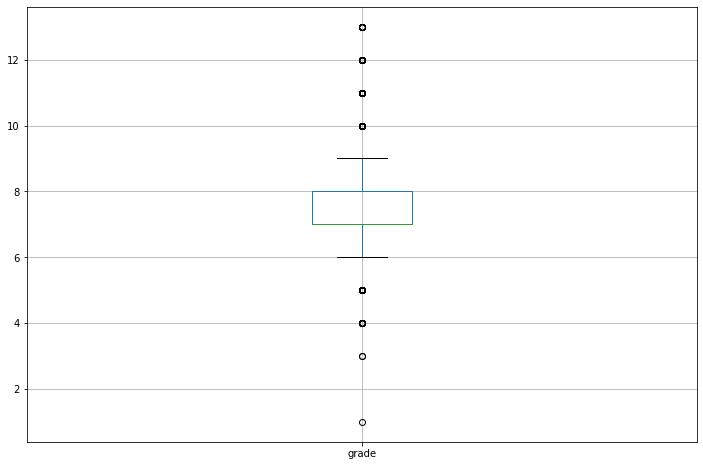

In [10]:
boxplot = df_train.boxplot(column=['grade'], figsize = (12,8))

In [11]:
len(df_train['zipcode'].unique())

70

In [12]:
df_train.sort_values('bedrooms', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010
8597,2402100895,1403654400000000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,0,53.749487
2356,1773100755,1408579200000000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,0,55.622177
11181,627300145,1407974400000000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,0,55.392197
3680,8812401450,1419811200000000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,0,59.893224
17114,5566100170,1414540800000000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,0,57.889117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,2310060040,1411603200000000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,0,56.772074
13989,6896300380,1412208000000000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,0,57.002053
15733,7849202299,1424217600000000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,0,61.568789
483,3374500520,1430265600000000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,0,63.868583


In [13]:
df_train['bedrooms'][8597] = 3

In [14]:
df_train['bdrms_squared'] = df_train['bedrooms'] ** 2



In [15]:
df_train['sale_year'] = pd.DatetimeIndex(df_train['date']).year

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17290 non-null  int64  
 1   date               17290 non-null  int64  
 2   price              17290 non-null  float64
 3   bedrooms           17290 non-null  int64  
 4   bathrooms          17290 non-null  float64
 5   sqft_living        17290 non-null  int64  
 6   sqft_lot           17290 non-null  int64  
 7   floors             17290 non-null  float64
 8   waterfront         17290 non-null  int64  
 9   view               17290 non-null  int64  
 10  condition          17290 non-null  int64  
 11  grade              17290 non-null  int64  
 12  sqft_above         17290 non-null  int64  
 13  sqft_basement      17290 non-null  int64  
 14  yr_built           17290 non-null  int64  
 15  yr_renovated       17290 non-null  int64  
 16  zipcode            172

In [16]:

x = df_train['yr_renovated']
y = df_train['sale_year']
z = df_train['yr_built']
condlist = [x == 0, x != 0]
choicelist = [y-z, y-x]
df_train['years_since_reno'] = np.select(condlist, choicelist)

In [17]:
x = df_train['yr_renovated']
condlist = [x >= 2012, x < 2012]
choicelist = [1, 0]
df_train['recent_reno'] = np.select(condlist, choicelist)

In [18]:
from statsmodels.formula.api import ols

lr_model = ols(formula='price~yr_built+view+bedrooms+sqft_living+grade+waterfront', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     5267.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:48:21   Log-Likelihood:            -2.3738e+05
No. Observations:               17290   AIC:                         4.748e+05
Df Residuals:                   17283   BIC:                         4.748e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.751e+06   1.24e+05     46.415      0.000    5.51e+06    5.99e+06
yr_built    -3304.0936     65.513    -50.434      0.000   -3432.506   -3175.681
view         4.505e+04   2518.268     17.890      0.000    4.01e+04       5e+04
bedrooms    -3.481e+04   2334.785    -14.909      0.000   -3.94e+04   -3.02e+04
sqft_living   195.6291      3.365     58.144      0.000     189.034     202.224
grade        1.302e+05   2398.729     54.265      0.000    1.25e+05    1.35e+05
waterfront   5.895e+05   2.08e+04     28.327      0.000    5.49e+05     6.3e+05
==============================================================================
Omnibus:                    13268.148   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1007961.238
Skew:                           3.092   Prob(JB):                         0.00
Kurtosis:                      39.890   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
zips_by_price = df_train.groupby('zipcode').mean()['price'].to_frame()
zips_by_price = zips_by_price.sort_values('price').reset_index().reset_index()

In [20]:
zips_by_price['index'] = zips_by_price['index'] + 1


<AxesSubplot:xlabel='mod_index', ylabel='price'>

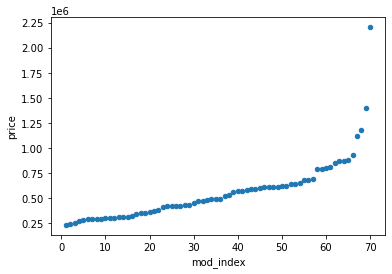

In [21]:
zips_by_price['mod_index'] = (zips_by_price['index'])
zips_by_price.plot.scatter('mod_index', 'price')

In [22]:
df_train['zips_by_price'] = df_train['zipcode']

In [23]:
zips_by_mean_price_dict = dict(zip(zips_by_price['zipcode'], zips_by_price['index']))

In [24]:
df_train['zips_by_price'] = df_train['zipcode']
df_train['zips_by_price'].replace(zips_by_mean_price_dict, inplace = True)

In [25]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price
0,2591820310,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18
1,7974200820,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37
4,9510861140,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31
17288,122069107,1417651200000000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,59.071869,9,2014,43,0,21


In [26]:
df_train.corr()['price']

id                  -0.015644
date                -0.008652
price                1.000000
bedrooms             0.313775
bathrooms            0.524335
sqft_living          0.703540
sqft_lot             0.086803
floors               0.256985
waterfront           0.275779
view                 0.395485
condition            0.036099
grade                0.666215
sqft_above           0.607760
sqft_basement        0.323312
yr_built             0.056450
yr_renovated         0.117770
zipcode             -0.048958
lat                  0.302394
long                 0.019327
sqft_living15        0.585567
sqft_lot15           0.081423
second_sale         -0.028629
months_since_2010   -0.008652
bdrms_squared        0.308328
sale_year           -0.002334
years_since_reno    -0.104828
recent_reno          0.023070
zips_by_price        0.567784
Name: price, dtype: float64

In [27]:
from statsmodels.formula.api import ols

lr_model = ols(formula='price~zips_by_price', data=df_train).fit()


In [28]:
df_train['distance_from_space_needle'] = np.sqrt((47.6205 - df_train['lat']) ** 2 + (122.3493 - df_train['long']) ** 2)

In [29]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle
0,2591820310,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18,244.511368
1,7974200820,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47,244.634307
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62,244.478306
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37,244.577313
4,9510861140,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53,244.432304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52,244.461302
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63,244.637305
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31,244.611342
17288,122069107,1417651200000000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,59.071869,9,2014,43,0,21,244.339382


In [30]:
lr_model = ols(formula='price~yr_built+view+bedrooms+sqft_living+grade+waterfront+recent_reno+zips_by_price+distance_from_space_needle', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     5601.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:48:22   Log-Likelihood:            -2.3456e+05
No. Observations:               17290   AIC:                         4.691e+05
Df Residuals:                   17280   BIC:                         4.692e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.288e+07   2.85e+06    -22.080      0.000   -6.85e+07   -5.73e+07
yr_built                   -1613.2203     62.238    -25.920      0.000   -1735.213   -1491.228
view                        4.621e+04   2148.648     21.507      0.000     4.2e+04    5.04e+04
bedrooms                   -3.017e+04   1986.440    -15.187      0.000   -3.41e+04   -2.63e+04
sqft_living                  205.5206      2.896     70.977      0.000     199.845     211.196
grade                       6.883e+04   2174.214     31.659      0.000    6.46e+04    7.31e+04
waterfront                  6.188e+05   1.77e+04     34.975      0.000    5.84e+05    6.54e+05
recent_reno                 2.886e+04   1.72e+04      1.676      0.094   -4886.093    6.26e+04
zips_by_price               6861.4082     85.268     80.469      0.000    6694.274    7028.542
distance_from_space_needle  2.678e+05   1.15e+04     23.380      0.000    2.45e+05     2.9e+05
==============================================================================
Omnibus:                    17509.685   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3239169.324
Skew:                           4.590   Prob(JB):                         0.00
Kurtosis:                      69.423   Cond. No.                     5.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>

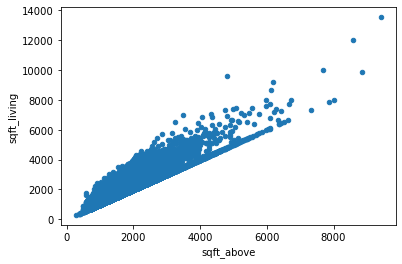

In [31]:
df_train.plot.scatter('sqft_above', 'sqft_living')

In [32]:
#next you should scale it to get a sense of the size of the coefficients? 

In [33]:
df_price = pd.read_csv('KC_zips_price.csv')

In [34]:
zips_by_mean_price_dict_ext = dict(zip(df_price['Zip'], df_price['Rank']))

In [35]:
zips_by_mean_price_dict_ext

{98039: 1,
 98004: 2,
 98040: 3,
 98112: 4,
 98075: 5,
 98006: 6,
 98077: 7,
 98033: 8,
 98105: 9,
 98074: 10,
 98119: 11,
 98199: 12,
 98005: 13,
 98107: 14,
 98110: 15,
 98053: 16,
 98117: 17,
 98115: 18,
 98122: 19,
 98052: 20,
 98008: 21,
 98103: 22,
 98109: 23,
 98116: 24,
 98102: 25,
 98177: 26,
 98072: 27,
 98020: 28,
 98029: 29,
 98065: 30,
 98136: 31,
 98027: 32,
 98144: 33,
 98050: 34,
 98101: 35,
 98028: 36,
 98024: 37,
 98333: 38,
 98014: 39,
 98121: 40,
 98296: 41,
 98070: 42,
 98019: 43,
 98125: 44,
 98104: 45,
 98059: 46,
 98034: 47,
 98011: 48,
 98126: 49,
 98155: 50}

In [36]:
df_train['zips_by_price_ext'] = df_train['zipcode']
df_train['zips_by_price_ext'].replace(zips_by_mean_price_dict_ext, inplace = True)

In [37]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle,zips_by_price_ext
0,2591820310,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18,244.511368,98058
1,7974200820,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47,244.634307,18
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62,244.478306,6
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37,244.577313,47
4,9510861140,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53,244.432304,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52,244.461302,21
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63,244.637305,9
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31,244.611342,36
17288,122069107,1417651200000000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,59.071869,9,2014,43,0,21,244.339382,98038


In [38]:
x = df_train['zips_by_price_ext']
condlist = [x > 50, x <51]
choicelist = [51, x]
df_train['zips_by_price_ext_tidy'] = np.select(condlist, choicelist)

In [39]:
lr_model = ols(formula='price~yr_built+bedrooms+sqft_living+grade+waterfront+zips_by_price_ext_tidy+distance_from_space_needle', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6459.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:48:22   Log-Likelihood:            -2.3525e+05
No. Observations:               17290   AIC:                         4.705e+05
Df Residuals:                   17282   BIC:                         4.706e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5.051e+07   2.93e+06    -17.219      0.000   -5.63e+07   -4.48e+07
yr_built                   -2003.0016     63.665    -31.462      0.000   -2127.792   -1878.212
bedrooms                   -3.261e+04   2061.678    -15.819      0.000   -3.67e+04   -2.86e+04
sqft_living                  213.9039      2.974     71.914      0.000     208.074     219.734
grade                       7.956e+04   2244.529     35.445      0.000    7.52e+04     8.4e+04
waterfront                    7.8e+05    1.7e+04     45.784      0.000    7.47e+05    8.13e+05
zips_by_price_ext_tidy     -6745.9873     95.201    -70.860      0.000   -6932.591   -6559.383
distance_from_space_needle  2.219e+05   1.18e+04     18.809      0.000    1.99e+05    2.45e+05
==============================================================================
Omnibus:                    16495.730   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2465875.808
Skew:                           4.197   Prob(JB):                         0.00
Kurtosis:                      60.900   Cond. No.                     5.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
df_train.corr()['price']

id                           -0.015644
date                         -0.008652
price                         1.000000
bedrooms                      0.313775
bathrooms                     0.524335
sqft_living                   0.703540
sqft_lot                      0.086803
floors                        0.256985
waterfront                    0.275779
view                          0.395485
condition                     0.036099
grade                         0.666215
sqft_above                    0.607760
sqft_basement                 0.323312
yr_built                      0.056450
yr_renovated                  0.117770
zipcode                      -0.048958
lat                           0.302394
long                          0.019327
sqft_living15                 0.585567
sqft_lot15                    0.081423
second_sale                  -0.028629
months_since_2010            -0.008652
bdrms_squared                 0.308328
sale_year                    -0.002334
years_since_reno         

<AxesSubplot:xlabel='zips_by_price_ext_tidy', ylabel='price'>

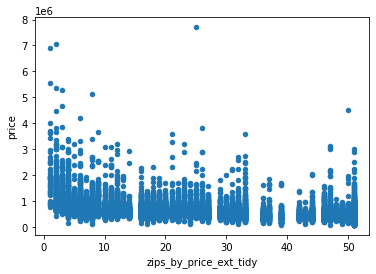

In [41]:
df_train.plot.scatter('zips_by_price_ext_tidy', 'price')

In [42]:
df_train['price'].max()

7700000.0

In [43]:
df_train.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle,zips_by_price_ext,zips_by_price_ext_tidy
10366,6762700020,1413158400000000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,0,57.363450,36,2014,27,0,66,244.672300,25,25
6903,9808700762,1402444800000000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,0,53.289528,25,2014,13,0,69,244.563302,2,2
7519,9208900037,1411084800000000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,0,56.574949,36,2014,13,0,70,244.589300,1,1
2232,2470100110,1407110400000000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,0,55.063655,25,2014,13,0,70,244.582300,1,1
1979,8907500070,1428883200000000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,0,63.342916,25,2015,6,0,69,244.569300,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,1623049041,1399507200000000000,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570,0,52.172485,4,2014,63,0,2,244.645340,98168,51
15956,3883800011,1415145600000000000,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,0,58.119097,9,2014,60,0,20,244.690330,98146,51
9193,8658300340,1400803200000000000,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500,0,52.665298,1,2014,102,0,30,244.258302,39,39
4869,40000362,1399334400000000000,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387,0,52.106776,4,2014,72,0,2,244.629344,98168,51


In [44]:
df_train['zips_by_price_ext_tidy_power'] = df_train['zips_by_price_ext_tidy'] ** -.316

In [45]:
lr_model = ols(formula='price~sqft_living+grade+waterfront+zips_by_price_ext_tidy+zips_by_price_ext_tidy_power', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     8199.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:48:23   Log-Likelihood:            -2.3586e+05
No. Observations:               17290   AIC:                         4.717e+05
Df Residuals:                   17284   BIC:                         4.718e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.701e+05   2.06e+04    -22.810      0.000   -5.11e+05    -4.3e+05
sqft_living                    177.6570      2.620     67.804      0.000     172.521     182.793
grade                          5.27e+04   2107.291     25.009      0.000    4.86e+04    5.68e+04
waterfront                    8.689e+05   1.75e+04     49.666      0.000    8.35e+05    9.03e+05
zips_by_price_ext_tidy       -2783.5975    182.571    -15.247      0.000   -3141.456   -2425.739
zips_by_price_ext_tidy_power  8.964e+05   2.85e+04     31.492      0.000    8.41e+05    9.52e+05
==============================================================================
Omnibus:                    16311.035   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2454360.947
Skew:                           4.111   Prob(JB):                         0.00
Kurtosis:                      60.786   Cond. No.                     4.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
zip_indexing_NICHE = pd.read_csv("zip_indexing_NICHE.csv")

In [47]:
zip_indexing_NICHE

,Zip,NICHE ranking
0,98004,1
1,98055,2
2,98052,3
3,98109,5
4,98007,6
...,...,...
64,98148,69
65,98198,70
66,98030,70
67,98168,70


In [48]:
zips_by_NICHErank_dict = dict(zip(zip_indexing_NICHE['Zip'], zip_indexing_NICHE['NICHE ranking']))

In [49]:
df_train['zips_by_liv_qual'] = df_train['zipcode']
df_train['zips_by_liv_qual'].replace(zips_by_NICHErank_dict, inplace = True)

In [50]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle,zips_by_price_ext,zips_by_price_ext_tidy,zips_by_price_ext_tidy_power,zips_by_liv_qual
0,2591820310,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18,244.511368,98058,51,0.288674,48
1,7974200820,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47,244.634307,18,18,0.401175,16
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62,244.478306,6,6,0.567681,11
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37,244.577313,47,47,0.296222,27
4,9510861140,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53,244.432304,20,20,0.388038,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52,244.461302,21,21,0.382101,22
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63,244.637305,9,9,0.499412,20
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31,244.611342,36,36,0.322261,34
17288,122069107,1417651200000000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,59.071869,9,2014,43,0,21,244.339382,98038,51,0.288674,50


In [51]:
df_train['mod_zips_by_liv_qual'] = np.exp(-0.015 * df_train['zips_by_liv_qual'])

In [52]:
lr_model = ols(formula='price~sqft_living+grade+waterfront+mod_zips_by_liv_qual', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     8403.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:48:23   Log-Likelihood:            -2.3703e+05
No. Observations:               17290   AIC:                         4.741e+05
Df Residuals:                   17285   BIC:                         4.741e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -7.08e+05   1.31e+04    -54.219      0.000   -7.34e+05   -6.82e+05
sqft_living            194.6437      2.794     69.667      0.000     189.167     200.120
grade                 6.358e+04   2237.179     28.421      0.000    5.92e+04     6.8e+04
waterfront            8.744e+05   1.87e+04     46.706      0.000    8.38e+05    9.11e+05
mod_zips_by_liv_qual  5.865e+05   8842.385     66.329      0.000    5.69e+05    6.04e+05
==============================================================================
Omnibus:                    15883.110   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1708260.212
Skew:                           4.046   Prob(JB):                         0.00
Kurtosis:                      51.018   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
x = df_train.corr()['price'].to_frame().sort_values('price')

In [54]:
x['abs_price'] = np.sqrt((x['price'])**2)

In [55]:
x.sort_values('abs_price')

,price,abs_price
sale_year,-0.002334,0.002334
zips_by_liv_qual,-0.007854,0.007854
date,-0.008652,0.008652
months_since_2010,-0.008652,0.008652
id,-0.015644,0.015644
long,0.019327,0.019327
distance_from_space_needle,-0.019492,0.019492
recent_reno,0.023070,0.023070
second_sale,-0.028629,0.028629
condition,0.036099,0.036099


In [57]:
lr_model = ols(formula='price~C(zipcode)+sqft_living', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     650.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:48:49   Log-Likelihood:            -2.3519e+05
No. Observations:               17290   AIC:                         4.705e+05
Df Residuals:                   17219   BIC:                         4.711e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.054e+05   1.21e+04    -16.949      0.000   -2.29e+05   -1.82e+05
C(zipcode)[T.98002]  2.322e+04   1.95e+04      1.191      0.234    -1.5e+04    6.14e+04
C(zipcode)[T.98003]  -562.8645   1.75e+04     -0.032      0.974   -3.49e+04    3.38e+04
C(zipcode)[T.98004]  8.416e+05   1.73e+04     48.511      0.000    8.08e+05    8.76e+05
C(zipcode)[T.98005]  3.279e+05   2.03e+04     16.164      0.000    2.88e+05    3.68e+05
C(zipcode)[T.98006]  3.216e+05   1.54e+04     20.848      0.000    2.91e+05    3.52e+05
C(zipcode)[T.98007]  2.683e+05   2.12e+04     12.644      0.000    2.27e+05     3.1e+05
C(zipcode)[T.98008]  3.012e+05   1.75e+04     17.234      0.000    2.67e+05    3.35e+05
C(zipcode)[T.98010]  7.546e+04   2.56e+04      2.950      0.003    2.53e+04    1.26e+05
C(zipcode)[T.98011]  1.224e+05   1.93e+04      6.352      0.000    8.46e+04     1.6e+05
C(zipcode)[T.98014]  1.221e+05   2.27e+04      5.376      0.000    7.76e+04    1.67e+05
C(zipcode)[T.98019]  6.895e+04      2e+04      3.446      0.001    2.97e+04    1.08e+05
C(zipcode)[T.98022]  4.922e+04   1.84e+04      2.675      0.007    1.32e+04    8.53e+04
C(zipcode)[T.98023] -1.683e+04   1.51e+04     -1.112      0.266   -4.65e+04    1.28e+04
C(zipcode)[T.98024]  1.912e+05    2.7e+04      7.092      0.000    1.38e+05    2.44e+05
C(zipcode)[T.98027]  1.775e+05   1.59e+04     11.180      0.000    1.46e+05    2.09e+05
C(zipcode)[T.98028]  1.272e+05   1.76e+04      7.216      0.000    9.27e+04    1.62e+05
C(zipcode)[T.98029]  2.307e+05    1.7e+04     13.561      0.000    1.97e+05    2.64e+05
C(zipcode)[T.98030] -3426.2692   1.81e+04     -0.190      0.850   -3.88e+04     3.2e+04
C(zipcode)[T.98031]  6020.0596   1.77e+04      0.340      0.734   -2.87e+04    4.07e+04
C(zipcode)[T.98032]  2.038e+04   2.25e+04      0.904      0.366   -2.38e+04    6.46e+04
C(zipcode)[T.98033]  3.949e+05   1.56e+04     25.268      0.000    3.64e+05    4.26e+05
C(zipcode)[T.98034]  2.236e+05    1.5e+04     14.955      0.000    1.94e+05    2.53e+05
C(zipcode)[T.98038]  2.061e+04   1.48e+04      1.390      0.165   -8453.108    4.97e+04
C(zipcode)[T.98039]  1.414e+06   3.26e+04     43.375      0.000    1.35e+06    1.48e+06
C(zipcode)[T.98040]  5.998e+05   1.75e+04     34.207      0.000    5.65e+05    6.34e+05
C(zipcode)[T.98042]  1.264e+04    1.5e+04      0.841      0.401   -1.68e+04    4.21e+04
C(zipcode)[T.98045]  1.196e+05   1.88e+04      6.363      0.000    8.28e+04    1.56e+05
C(zipcode)[T.98052]  2.435e+05   1.47e+04     16.530      0.000    2.15e+05    2.72e+05
C(zipcode)[T.98053]  2.109e+05    1.6e+04     13.196      0.000     1.8e+05    2.42e+05
C(zipcode)[T.98055]  5.028e+04   1.78e+04      2.819      0.005    1.53e+04    8.52e+04
C(zipcode)[T.98056]  1.084e+05   1.58e+04      6.863      0.000    7.75e+04    1.39e+05
C(z